In [13]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Load 2020 cleaned dataset
df_2020_cleaned = pd.read_csv('heart_2020_cleaned.csv')
df_2022_no_nans = pd.read_csv('heart_2022_no_nans.csv')
df_2022_with_nans = pd.read_csv(
    'heart_2022_with_nans.csv',
    on_bad_lines='skip',            # ✅ New replacement
    quoting=csv.QUOTE_MINIMAL       # Handles embedded commas in quotes
)

In [8]:
#df_2022_with_nans.head(5)
df_2020_cleaned.head(5)
#df_2022_no_nans.head(5)

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [6]:
# Step 2: Industry-standard cleaning function
def clean_dataframe(df):
    # 1. Standardize column names to lowercase + snake_case
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )

    # 2. Replace empty strings with NaN for consistency
    df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)
    # 3. Convert Yes/No to 1/0 wherever applicable
    for col in df.columns:
        if df[col].dropna().isin(['Yes', 'No']).all():
            df[col] = df[col].map({'Yes': 1, 'No': 0})
    # 4. Convert object/text columns to category type
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    # 5. Impute missing values
    for col in df.columns:
        if df[col].dtype.name == 'category':
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].mode()[0])  # mode for categorical
        elif df[col].dtype in ['float64', 'int64']:
            if df[col].isnull().sum() > 0:
                df[col] = df[col].fillna(df[col].median())  # median for numeric

    # 6. Trim whitespace in categorical fields
    for col in df.select_dtypes(include='category').columns:
        df[col] = df[col].str.strip()

    return df

df_2020_clean = clean_dataframe(df_2020_cleaned)
df_2022_no_nans_clean = clean_dataframe(df_2022_no_nans)
df_2022_with_nans_clean = clean_dataframe(df_2022_with_nans)

In [11]:
# Remove duplicate rows from all datasets
df_2020_clean = df_2020_clean.drop_duplicates()
df_2022_no_nans_clean = df_2022_no_nans_clean.drop_duplicates()
df_2022_with_nans_clean = df_2022_with_nans_clean.drop_duplicates()

In [15]:
smoking_counts = df_2022_no_nans_clean['smokerstatus'].value_counts()

# Percentage of each smoking status
smoking_percent = df_2022_no_nans_clean['smokerstatus'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
smoking_summary = pd.DataFrame({
    'count': smoking_counts,
    'percentage': smoking_percent.round(2)
})

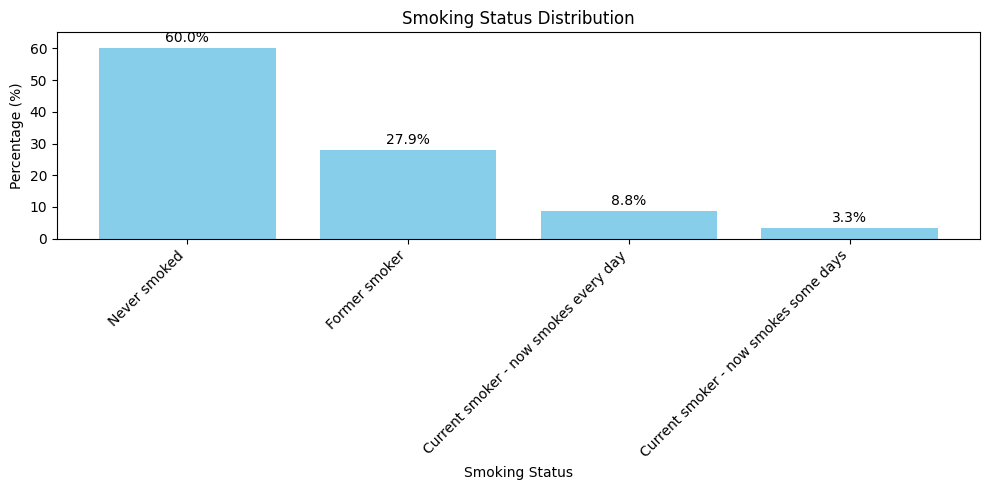

In [14]:
# Assuming you already have your cleaned DataFrame
# Replace this with your actual cleaned dataframe name if different
df = df_2022_no_nans_clean

# Step 1: Count and percentage of smoking categories
smoking_counts = df['smokerstatus'].value_counts()
smoking_percent = df['smokerstatus'].value_counts(normalize=True) * 100

# Step 2: Combine into one DataFrame
smoking_summary = pd.DataFrame({
    'count': smoking_counts,
    'percentage': smoking_percent.round(2)
})

# Step 3: Plot with Matplotlib
plt.figure(figsize=(10, 5))
bars = plt.bar(smoking_summary.index, smoking_summary['percentage'], color='skyblue')

# Step 4: Add labels and title
plt.title("Smoking Status Distribution")
plt.ylabel("Percentage (%)")
plt.xlabel("Smoking Status")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, smoking_summary['percentage'].max() + 5)

# Step 5: Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


                Indicator   Count  Percentage
0           Drink Alcohol  135299       55.00
1        Obese (BMI > 30)   84123       34.19
2           Have Diabetes       0        0.00
3            Had a Stroke   10111        4.11
4  Lack Physical Activity   54703       22.24


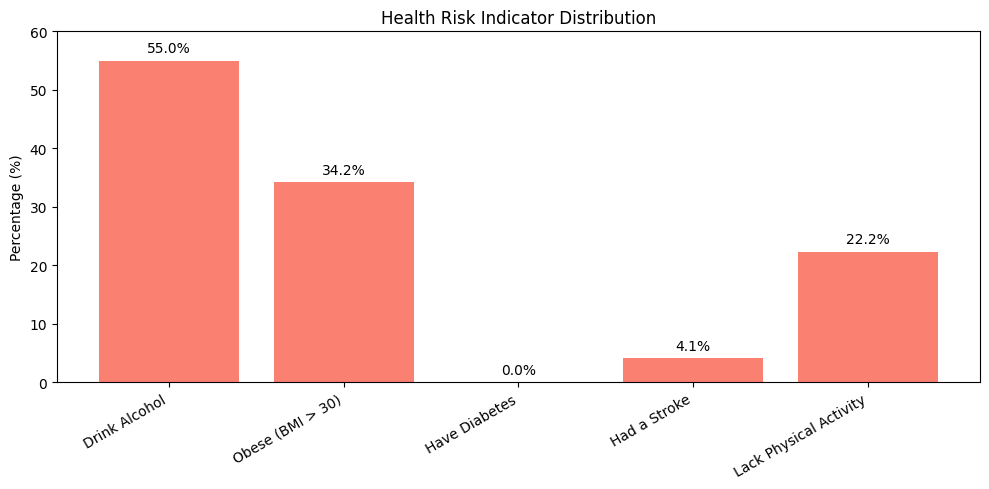

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the cleaned 2022 dataset
df = df_2022_no_nans_clean.copy()

# Define each health risk indicator with filtering logic
indicators = {
    "Drink Alcohol": df['alcoholdrinkers'] == 1,
    "Obese (BMI > 30)": df['bmi'] > 30,
    "Have Diabetes": df['haddiabetes'] == 1,
    "Had a Stroke": df['hadstroke'] == 1,
    "Lack Physical Activity": df['physicalactivities'] == 0
}

# Step 1: Calculate counts and percentages
total = len(df)
summary_data = []

for label, condition in indicators.items():
    count = condition.sum()
    percent = (count / total) * 100
    summary_data.append({'Indicator': label, 'Count': count, 'Percentage': round(percent, 2)})

summary_df = pd.DataFrame(summary_data)

# Step 2: Display summary
print(summary_df)

# Step 3: Plot using Matplotlib
plt.figure(figsize=(10, 5))
bars = plt.bar(summary_df['Indicator'], summary_df['Percentage'], color='salmon')
plt.title("Health Risk Indicator Distribution")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30, ha='right')
plt.ylim(0, summary_df['Percentage'].max() + 5)

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



--- Age Group Summary ---
        agecategory  Total  Heart_Attack_Cases  Heart_Attack_Rate
12  Age 80 or older  17816                2426              13.62
11     Age 75 to 79  18133                2065              11.39
10     Age 70 to 74  25737                2408               9.36
9      Age 65 to 69  28555                2155               7.55
8      Age 60 to 64  26719                1575               5.89
7      Age 55 to 59  22224                1112               5.00
6      Age 50 to 54  19912                 703               3.53
5      Age 45 to 49  16753                 420               2.51
4      Age 40 to 44  16973                 228               1.34
3      Age 35 to 39  15614                 156               1.00
2      Age 30 to 34  13346                  90               0.67
1      Age 25 to 29  11109                  47               0.42
0      Age 18 to 24  13122                  50               0.38


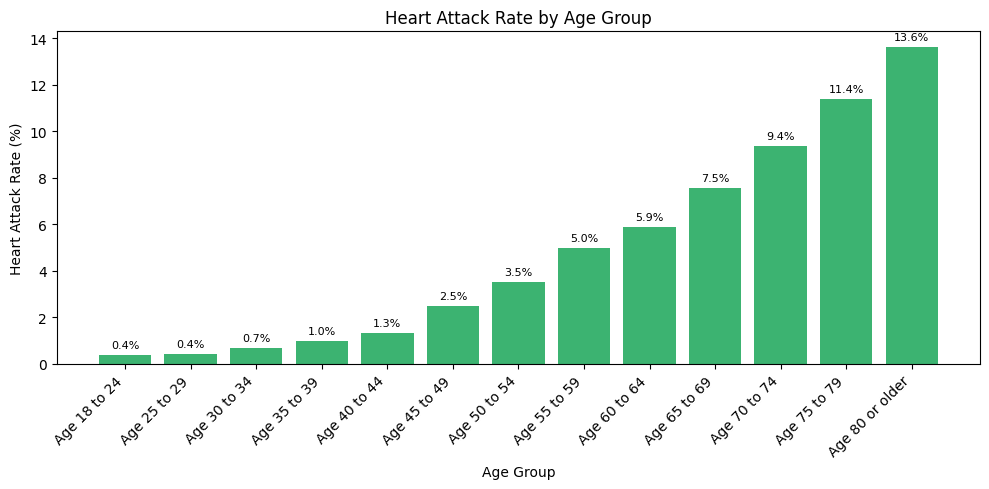


--- Gender Summary ---
      sex   Total  Heart_Attack_Cases  Heart_Attack_Rate
1    Male  118207                8503               7.19
0  Female  127806                4932               3.86


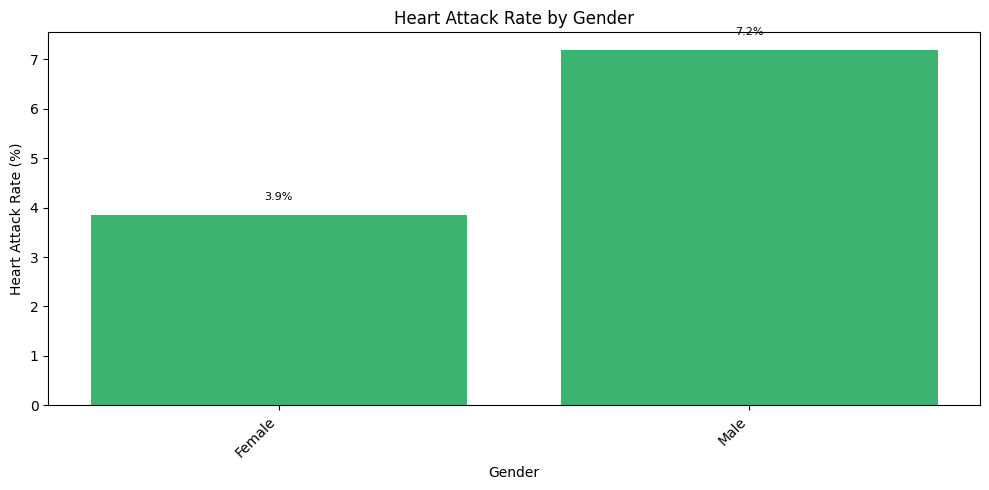


--- Race/Ethnicity Summary ---
           raceethnicitycategory   Total  Heart_Attack_Cases  \
2      Multiracial, Non-Hispanic    5581                 340   
4       White only, Non-Hispanic  186327               10756   
3  Other race only, Non-Hispanic   12205                 591   
0       Black only, Non-Hispanic   19330                 889   
1                       Hispanic   22570                 859   

   Heart_Attack_Rate  
2               6.09  
4               5.77  
3               4.84  
0               4.60  
1               3.81  


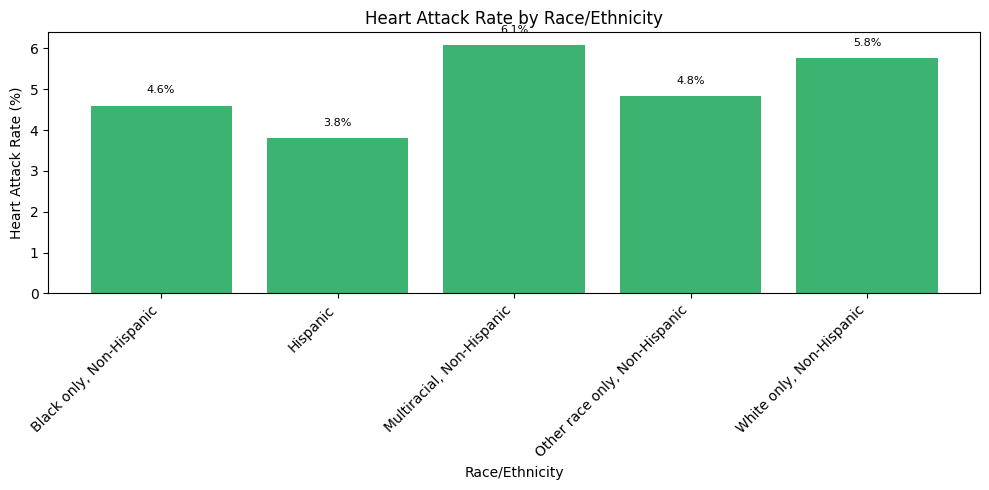


--- State Summary ---
                   state  Total  Heart_Attack_Cases  Heart_Attack_Rate
3               Arkansas   2940                 244               8.30
51         West Virginia   2974                 246               8.27
9                Florida   7315                 557               7.61
20                 Maine   6013                 425               7.07
28              Nebraska   5107                 344               6.74
43          South Dakota   4404                 294               6.68
30         New Hampshire   3756                 248               6.60
2                Arizona   5461                 359               6.57
18              Kentucky   2413                 158               6.55
36                  Ohio   8995                 589               6.55
0                Alabama   1902                 124               6.52
44             Tennessee   2725                 177               6.50
37              Oklahoma   2941                 188   

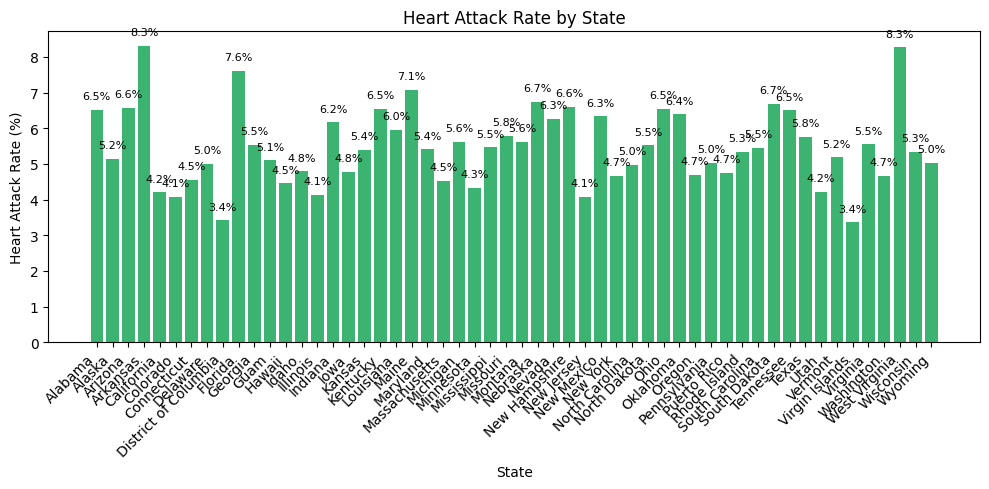

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset to use
df = df_2022_no_nans_clean.copy()

# Define demographic dimensions to analyze
dimensions = {
    "Age Group": "agecategory",
    "Gender": "sex",
    "Race/Ethnicity": "raceethnicitycategory",
    "State": "state"
}

# Loop through each and create grouped summaries + charts
for label, col in dimensions.items():
    group_summary = df.groupby(col)['hadheartattack'].agg(['count', 'sum', 'mean']).reset_index()
    group_summary.columns = [col, 'Total', 'Heart_Attack_Cases', 'Heart_Attack_Rate']
    group_summary['Heart_Attack_Rate'] = (group_summary['Heart_Attack_Rate'] * 100).round(2)

    # Display summary
    print(f"\n--- {label} Summary ---")
    print(group_summary.sort_values(by='Heart_Attack_Rate', ascending=False))

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(group_summary[col], group_summary['Heart_Attack_Rate'], color='mediumseagreen')
    plt.title(f"Heart Attack Rate by {label}")
    plt.xlabel(label)
    plt.ylabel("Heart Attack Rate (%)")
    plt.xticks(rotation=45, ha='right')

    # Add value labels
    for i, rate in enumerate(group_summary['Heart_Attack_Rate']):
        plt.text(i, rate + 0.3, f"{rate:.1f}%", ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()
